In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from PIL import Image
from scipy import ndimage as ndi

from skimage.morphology import watershed
import skimage
%matplotlib inline

In [2]:
mask = cv2.imread('data/stage1_train_/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masksmask.png', 0)
image = cv2.imread('data/stage1_train_/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png', 0)

In [3]:
imgs = os.listdir('data/stage2_test/')

In [8]:
def split_mask(step, image, save_folder):
    # path = "data/stage1_train_/{}/masksmask.png".format(image)
    path = "data/stage2_test/{}/images/{}.png".format(image, image)
    mask = cv2.imread(path)
    # print(mask.shape)
    height, width, _ =  mask.shape
    matrices = []
    cnt_h = 0
    cnt_w = 0
    while (height > 0):
        if height > step:
            step_h = step
            b = (cnt_h+1)*step_h
            a = cnt_h*step_h
        else:
            step_h = step
            b = mask.shape[0]
            a = mask.shape[0]-step_h
#             print(a,b)
        width = mask.shape[1]
        cnt_w = 0
#         print(width)
        while (width > 0):
            zeros = np.zeros((step, step))
            if width > step:
                step_w = step
                zeros = mask[a:b, cnt_w*step_w:(cnt_w+1)*step_w]
#                 print(cnt_w*step_w, (cnt_w+1)*step_w)
#                 print(a, b)
            else:
                step_w = step
#                 print(step_w)
                zeros = mask[a:b, (mask.shape[1] - step_w):mask.shape[1]]
#                 print((mask.shape[1] - width), mask.shape[1])
#                 print(a, b)
            cnt_w += 1
#             print(cnt_w)
            matrices.append(zeros)
            cv2.imwrite('{}/{}_{}_{}.png'.format(save_folder, image, cnt_h, cnt_w), zeros)
            width = width - step_w
        cnt_h +=1
#         print('1')
        height = height - step_h
    # print(len(matrices))
    # return matrices

In [77]:
m = split_mask(128, imgs[1], 'data/cropped_test/')

(390, 239, 3)
8


In [9]:
[split_mask(128, img, 'data/cropped_test_2/') for img in imgs]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [10]:
out = os.listdir('output/mask_test_2/')

In [14]:
files = [i.split('_')[0] for i in out]

In [16]:
files = set(files)

In [17]:
len(files)

3019

In [55]:
outs_.shape

AttributeError: 'list' object has no attribute 'shape'

In [48]:
y = np.hstack(y)

In [50]:
y.reshape(4, len(outs_))

ValueError: cannot reshape array of size 9745 into shape (4,2437)

In [57]:
y=np.array([np.array(xi) for xi in outs_])

In [58]:
for i in y:
    if i.shape != 4:
        print(i)

['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '1' '0']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '1' '1']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '1' '2']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '2' '0']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '2' '1']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '0'
 '2' '2']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '1' '0']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '1' '1']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '1' '2']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '2' '0']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '2' '1']
['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5' '1'
 '2' '2']
['0999dab07b11bc

 '2' '1']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '2' '2']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '3' '0']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '3' '1']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '3' '2']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '4' '0']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '4' '1']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '4' '2']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '5' '0']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '5' '1']
['1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c' '3'
 '5' '2']
['17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff' '0'
 '1' '0']
['17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff' '0'
 '1' '1']
['17b9

 '1' '2']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '2' '0']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '2' '1']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '2' '2']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '3' '0']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '3' '1']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '3' '2']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '4' '0']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '4' '1']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '4' '2']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '5' '0']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '5' '1']
['1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b' '1'
 '5' '2']
['1879

 '1' '0']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '1' '1']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '1' '2']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '2' '0']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '2' '1']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '2' '2']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '3' '0']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '3' '1']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '3' '2']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '4' '0']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '4' '1']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '4' '2']
['1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e' '1'
 '5' '0']
['1cdb

 '2' '1']
['1ef68e93964c2d9230100c1347c328f6385a7bc027879dc3d4c055e6fe80cb3c' '1'
 '2' '2']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '1' '0']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '1' '1']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '1' '2']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '2' '0']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '2' '1']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '2' '2']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '3' '0']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '3' '1']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '3' '2']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '4' '0']
['259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4' '0'
 '4' '1']
['259b

 '1' '2']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '0'
 '2' '0']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '0'
 '2' '1']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '0'
 '2' '2']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '1' '0']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '1' '1']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '1' '2']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '2' '0']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '2' '1']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '1'
 '2' '2']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '2'
 '1' '0']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '2'
 '1' '1']
['336d3e4105766f8ad328a7ee9571e743f376f8cbcf6a969ca7e353fe3235c523' '2'
 '1' '2']
['336d

 '3' '0']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '1'
 '3' '1']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '1'
 '3' '2']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '1' '0']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '1' '1']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '1' '2']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '2' '0']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '2' '1']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '2' '2']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '3' '0']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '3' '1']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '2'
 '3' '2']
['432f367a4c5b5674de2e2977744d10289a064e5704b21af6607b4975be47c580' '3'
 '1' '0']
['432f

 '3' '1']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '3' '2']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '4' '0']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '4' '1']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '4' '2']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '5' '0']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '5' '1']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '5' '2']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '6' '0']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '6' '1']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '2'
 '6' '2']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '3'
 '1' '0']
['44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078' '3'
 '1' '1']
['44af

 '2' '2']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '3' '0']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '3' '1']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '3' '2']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '4' '0']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '4' '1']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '4' '2']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '5' '0']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '5' '1']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '5' '2']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '6' '0']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '6' '1']
['472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71' '3'
 '6' '2']
['4be7

 '3' '0']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '3' '1']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '3' '2']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '4' '0']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '4' '1']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '4' '2']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '5' '0']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '5' '1']
['505bc0a3928d8aef5ce441c5a611fdd32e1e8eccdc15cc3a52b88030acb50f81' '3'
 '5' '2']
['519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0' '0'
 '1' '0']
['519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0' '0'
 '1' '1']
['519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0' '0'
 '1' '2']
['519dc0d672d1c295fc69b629af8721ccb1a1f136d1976685a68487e62547ffe0' '0'
 '2' '0']
['519d

 '1' '1']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '1' '2']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '2' '0']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '2' '1']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '2' '2']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '3' '0']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '3' '1']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '3'
 '3' '2']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '4'
 '1' '0']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '4'
 '1' '1']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '4'
 '1' '2']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '4'
 '2' '0']
['550450e4bff4036fd671decdc5d42fec23578198d6a2fd79179c4368b9d6da18' '4'
 '2' '1']
['5504

 '2' '2']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '1' '0']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '1' '1']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '1' '2']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '2' '0']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '2' '1']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '2' '2']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '3' '0']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '3' '1']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '0'
 '3' '2']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '1'
 '1' '0']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '1'
 '1' '1']
['699f2992cd71e2e28cf45f81347ff22e76b37541ce88087742884cd0e9aadc68' '1'
 '1' '2']
['699f

 '5' '0']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '1'
 '5' '1']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '1'
 '5' '2']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '1' '0']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '1' '1']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '1' '2']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '2' '0']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '2' '1']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '2' '2']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '3' '0']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '3' '1']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '3' '2']
['7bdb668e6127b7eafc837a883f0648002bd063c736f55a4f673e787250a3fb04' '2'
 '4' '0']
['7bdb

 '4' '1']
['8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93df77acd5bf7c80b' '3'
 '4' '2']
['8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93df77acd5bf7c80b' '3'
 '5' '0']
['8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93df77acd5bf7c80b' '3'
 '5' '1']
['8922a6ac8fd0258ec27738ca101867169b20d90a60fc84f93df77acd5bf7c80b' '3'
 '5' '2']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '1' '0']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '1' '1']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '1' '2']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '2' '0']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '2' '1']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '2' '2']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '3' '0']
['8b59819fbc92eefe45b1db95c0cc3a467ddcfc755684c7f2ba2f6ccb9ad740ab' '0'
 '3' '1']
['8b59

 '2' '2']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '1' '0']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '1' '1']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '1' '2']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '2' '0']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '2' '1']
['912a679e4b9b1d1a75170254fd675b8c24b664d80ad7ea7e460241a23535a406' '1'
 '2' '2']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '1' '0']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '1' '1']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '1' '2']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '2' '0']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '2' '1']
['9ab2d381f90b485a68b82bc07f94397a0373e3215ad20935a958738e55f3cfc2' '0'
 '2' '2']
['9ab2

 '6' '0']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '1'
 '6' '1']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '1'
 '6' '2']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '1' '0']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '1' '1']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '1' '2']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '2' '0']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '2' '1']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '2' '2']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '3' '0']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '3' '1']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '3' '2']
['9f17aea854db13015d19b34cb2022cfdeda44133323fcd6bb3545f7b9404d8ab' '2'
 '4' '0']
['9f17

 '1' '1']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '0'
 '1' '2']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '0'
 '2' '0']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '0'
 '2' '1']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '0'
 '2' '2']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '1' '0']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '1' '1']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '1' '2']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '2' '0']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '2' '1']
['ab298b962a63e4be9582513aaa84a5e270adba5fd2b16a50e59540524f63c3b8' '1'
 '2' '2']
['ade080c6618cbbb0a25680cf847f312b5e19b22bfe1cafec0436987ebe5b1e7e' '0'
 '1' '0']
['ade080c6618cbbb0a25680cf847f312b5e19b22bfe1cafec0436987ebe5b1e7e' '0'
 '1' '1']
['ade0

 '6' '2']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '1' '0']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '1' '1']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '1' '2']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '2' '0']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '2' '1']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '2' '2']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '3' '0']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '3' '1']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '0'
 '3' '2']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '1'
 '1' '0']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '1'
 '1' '1']
['b83d1d77935b6cfd44105b54600ffc4b6bd82de57dec65571bcb117fa8398ba3' '1'
 '1' '2']
['b83d

 '1' '0']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '1' '1']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '1' '2']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '2' '0']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '2' '1']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '2' '2']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '3' '0']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '3' '1']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '3' '2']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '4' '0']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '4' '1']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '4' '2']
['bdc789019cee8ddfae20d5f769299993b4b330b2d38d1218646cf89e77fbbd4d' '3'
 '5' '0']
['bdc7

 '1' '1']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '3'
 '1' '2']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '3'
 '2' '0']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '3'
 '2' '1']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '3'
 '2' '2']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '1' '0']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '1' '1']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '1' '2']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '2' '0']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '2' '1']
['ca20076870e8fb604e61802605a9ac45419c82dd3e23404c56c4869f9502a5ef' '4'
 '2' '2']
['d616d323a9eeb9da1b66f8d5df671d63c092c9919cb2c0b223e29c63257c944d' '0'
 '1' '0']
['d616d323a9eeb9da1b66f8d5df671d63c092c9919cb2c0b223e29c63257c944d' '0'
 '1' '1']
['d616

 '1' '2']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '2' '0']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '2' '1']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '2' '2']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '3' '0']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '3' '1']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '3' '2']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '4' '0']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '4' '1']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '4' '2']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '5' '0']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '5' '1']
['da6c593410340b19bb212b9f6d274f95b08c0fc8f2570cd66bc5ed42c560acab' '0'
 '5' '2']
['da6c

 '1' '0']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '1' '1']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '1' '2']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '2' '0']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '2' '1']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '2' '2']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '3' '0']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '3' '1']
['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8' '2'
 '3' '2']
['e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258' '0'
 '1' '0']
['e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258' '0'
 '1' '1']
['e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258' '0'
 '1' '2']
['e17b7aedd251a016c01ef9158e6e4aa940d9f1b35942d86028dc1222192a9258' '0'
 '2' '0']
['e17b

 '5' '1']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '2'
 '5' '2']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '2'
 '6' '0']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '2'
 '6' '1']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '2'
 '6' '2']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '1' '0']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '1' '1']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '1' '2']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '2' '0']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '2' '1']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '2' '2']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '3' '0']
['f0d0ab13ff53adc3c4d57e95a5f83d80b06f2cbc0bf002b52cf7b496612e0ce4' '3'
 '3' '1']
['f0d0

 '2' '2']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '3' '0']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '3' '1']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '3' '2']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '4' '0']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '4' '1']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '4' '2']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '5' '0']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '5' '1']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '5' '2']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '6' '0']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '6' '1']
['f5effed21f671bbf4551ecebb7fe95f3be1cf09c16a60afe64d2f0b95be9d1eb' '3'
 '6' '2']
['fac5

In [37]:
np.array(outs_)

array([list(['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5', '0', '1', '0']),
       list(['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5', '0', '1', '1']),
       list(['0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5', '0', '1', '2']),
       ...,
       list(['fe9adb627a6f45747c5a8223b671774791ededf9364f6544be487c540107fa4f', '1', '2', '1']),
       list(['fe9adb627a6f45747c5a8223b671774791ededf9364f6544be487c540107fa4f', '1', '2', '2']),
       list(['Thumbs'])], dtype=object)

In [60]:
outs = [i.split('.', 1)[0] for i in out]
outs_ = [i.split('_', 3) for i in outs]
np_out = np.array([i.split('_', 3) for i in outs])

np_out[(np_out[:, 0] == 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8') & (np_out[:, -1] == '0')]

array([['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '0', '1', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '0', '2', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '0', '3', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '1', '1', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '1', '2', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '1', '3', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '2', '1', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '2', '2', '0'],
       ['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
        '2', '3', '0']], dtype='<U64')

In [51]:
outs = [i.split('.', 1)[0] for i in out]
outs_ = [i.split('_', 3)[0] for i in outs]
indxs = [i for i, j in enumerate(outs_) if j == 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8']

In [107]:
indxs = [i for i, j in enumerate(outs_) if j == 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8']

In [113]:
lol = [outs[i] for i in indxs]

In [115]:
xc = [i.split('_', 3)[-1] for i in lol]

In [119]:
zero_st = [i for i, j in enumerate(xc) if j == '0']

In [123]:
stuff = [lol[i] for i in zero_st]

In [124]:
sorted(stuff)

['df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_0_1_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_0_2_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_0_3_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_1_1_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_1_2_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_1_3_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_2_1_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_2_2_0',
 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8_2_3_0']

In [18]:
def get_sorted_names(crop_folder):
    crops = os.listdir(crop_folder)
    crops = [i.split('.', 1)[0] for i in crops]
    crops.sort(key = lambda x: int(x.rsplit('_',1)[1]))
    return [crop + '.tif' for crop in crops]

In [19]:
import operator

def get_sorted_names(name, file_list, ch):
    outs = [i.split('.', 1)[0] for i in file_list]
    np_out = np.array([i.split('_', 3) for i in outs])
    # print(np_out)
    zero_st = [(np_out[:, 0] == name) & (np_out[:, -1] == ch)]
    stuff = np.array(file_list)[zero_st]
    s = [i.split('_') for i in stuff]
    # s.sort(key = operator.itemgetter(1, 2))
    s = sorted(s, key = lambda x: (int(x[1]), int(x[2])))
    s = ['_'.join(i) for i in s]
    return s

In [25]:
def join_mask(step, image, crop_folder, save_folder, ch):
    # path = "data/stage1_train_/{}/masksmask.png".format(image)
    out = os.listdir(crop_folder)
    path = "data/stage2_test/{}/images/{}.png".format(image, image)
    crops = get_sorted_names(image, out, ch)
    mask = cv2.imread(path)
    height, width, _ =  mask.shape
    matrices = []
    zeros = np.zeros((height, width))
    cnt = 0
    cnt_h = 0
    cnt_w = 0
    while (height > 0):
        if height > step:
            step_h = step
            b = (cnt_h+1)*step_h
            a = cnt_h*step_h
        else:
            step_h = step
            b = mask.shape[0]
            a = mask.shape[0]-step_h
        width = mask.shape[1]
        cnt_w = 0
        while (width > 0):
            
            if width > step:
                step_w = step
                read_path = os.path.join(crop_folder, crops[cnt])
                zeros[a:b,cnt_w*step_w:(cnt_w+1)*step_w] = cv2.imread(read_path, 0)
                
            else:
                step_w = step
                read_path = os.path.join(crop_folder, crops[cnt])
                zeros[a:b,(mask.shape[1] - step_w):mask.shape[1]] = cv2.imread(read_path, 0)
            cnt_w += 1
            cnt += 1
            matrices.append(zeros)
            
            width = width - step_w
        cnt_h +=1
        height = height - step_h
    cv2.imwrite('{}/{}_{}.png'.format(save_folder, image, ch), zeros)

In [75]:
join_mask(128, 'df40099c6306ca1f47fcc8a62e2fa39486d4e223177afdc51b2ad189691802d8',
          'output/mask/', 'output/joined_mask/', '0')

In [24]:
imgs[0]

'0019c086029dd3be01f72131edb74e21ee995574e6d5c136ea868630b0d73523'

In [28]:
[join_mask(128, img, 'output/mask_test_2/', 'output/jm_test_2/', '0') for img in imgs]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

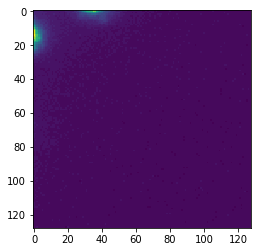

In [40]:
plt.imshow(mat[0])

In [26]:
crop('data/cropped_test',
     'data/stage1_test/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5/images/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5.png',
     128, 128)

1
ex
ex
ex
ex


In [13]:
res = cv2.resize(image, (128, 128), cv2.INTER_CUBIC)

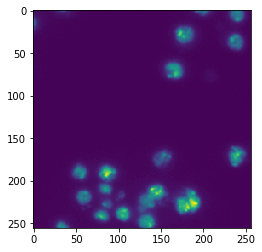

In [14]:
plt.imshow(image)

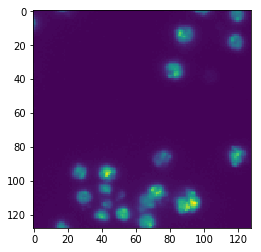

In [15]:
plt.imshow(res)

In [3]:
mask.shape

(256, 256)

In [28]:
test = np.zeros([4,3,128,128])
test[:,0,:,:].shape

(4, 128, 128)

In [6]:
mask1.shape

(3, 256, 256)

In [5]:
mask1 = np.zeros((3, *mask.shape))

In [23]:
#mask1 = np.zeros(3, (*mask.shape))
kernel = np.ones((4, 4), np.uint8)
seed = cv2.erode(mask[:,:,0], kernel, iterations=1)
border = mask[:,:,0] - seed
mask[:,:,1] = np.zeros(seed.shape)
mask[:,:,1] = seed
mask[:,:,2] = np.zeros(seed.shape)
mask[:,:,2] = border

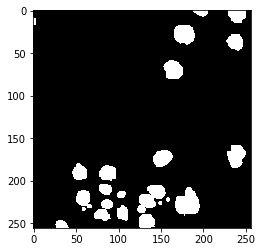

In [26]:
plt.imshow(mask[:,:,0], 'gray')

In [63]:
train_path = 'data/stage1_train/'

In [30]:
masks_path = 'data/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks'

In [87]:
files = os.listdir(train_path)
kernel = np.ones((3,3),np.uint8)
for i in tqdm(range(len(files))):
    masks = os.path.join(files[i], 'masks')
    img_path = os.path.join(train_path, masks)
    mask = unite(img_path)
    seed = cv2.erode(mask, kernel,iterations = 1)
    border = mask - seed
    cv2.imwrite(img_path + 'mask.png', mask)
    cv2.imwrite(img_path + 'seed.png', seed)
    cv2.imwrite(img_path + 'border.png', border)


100%|██████████| 664/664 [00:43<00:00, 15.20it/s]


In [86]:
def unite(masks_path):
    one_true = None
    for image in os.listdir(masks_path):
        img_path = os.path.join(masks_path, image)
        img_mask = cv2.imread(img_path)
        if not hasattr(one_true, 'shape'):
            one_true = img_mask
            # print(img_path)
        else:
            one_true = one_true + img_mask
    return one_true

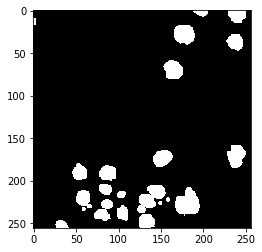

In [62]:
plt.imshow(one_true)

In [6]:
img = cv2.imread('data/stage1_train_/0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed/masksmask.png')

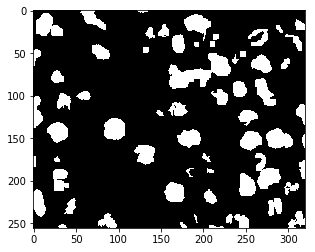

In [7]:
plt.imshow(img, 'gray')

In [23]:
mask = img.copy()
kernel = np.ones((4, 4), np.uint8)
seed = cv2.erode(mask[:, :, 0], kernel, iterations=3)
dil = cv2.dilate(mask[:, :, 0], kernel, iterations=6)
blackhat = cv2.morphologyEx(mask[:, :, 0], cv2.MORPH_BLACKHAT, kernel)
gradient = cv2.morphologyEx(mask[:, :, 0], cv2.MORPH_GRADIENT, kernel)

# dist = dil - mask[:, :, 0]
# dist = cv2.erode(dil, kernel, iterations=1)
dist = dil - mask[:, :, 0]
mask[:, :, 1] = np.zeros(seed.shape)
mask[:, :, 1] = gradient
# mask[:, :, 2] = np.zeros(seed.shape)
# mask[:, :, 2] = dist


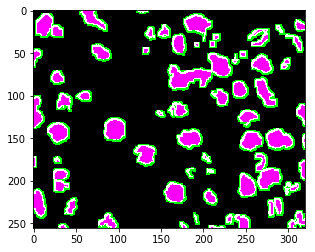

In [24]:
plt.imshow(mask, 'gray')

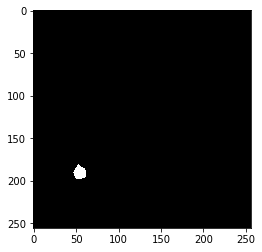

In [9]:
kernel = np.ones((3,3),np.uint8)
eroison = cv2.erode(img, kernel,iterations = 1)
border = img - eroison
plt.imshow(eroison)

(256, 256, 3)


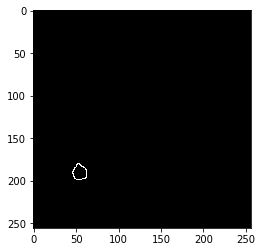

In [54]:
plt.imshow(border)
print(border.shape)

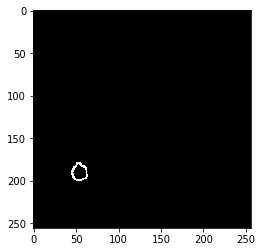

In [14]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)

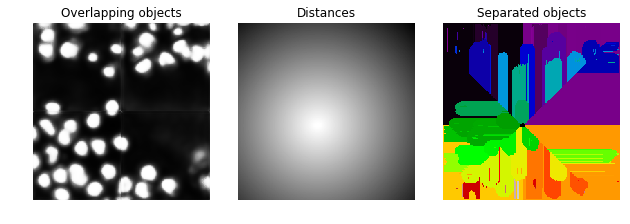

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
image = full_mask
distance = ndi.distance_transform_edt(full_mask)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=seed)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

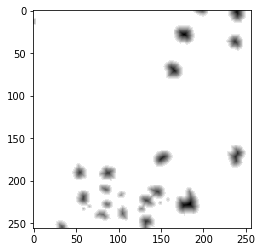

In [21]:
plt.imshow(-distance, 'gray')

In [6]:
name = '0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732'
full_mask = cv2.imread('output/joined_mask/{}_0.png'.format(name), 0)
seed = cv2.imread('output/seed/{}_1.png'.format(name), 0)
border = cv2.imread('output/border/{}_2.png'.format(name), 0)

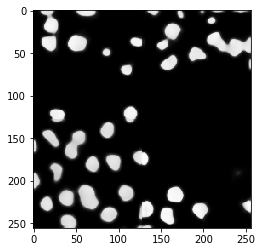

In [7]:
plt.imshow(border, 'gray')

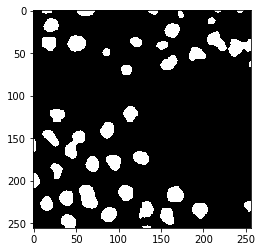

In [183]:
th = 230
full_mask[full_mask>=th] = 255
full_mask[full_mask<th] = 0
plt.imshow(full_mask, 'gray')

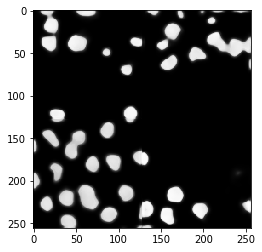

In [184]:
seed_ = border - seed
plt.imshow(seed_, 'gray')

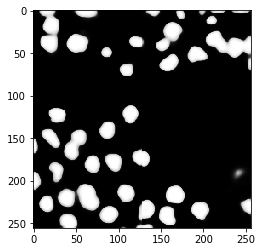

In [152]:
plt.imshow(seed, 'gray')

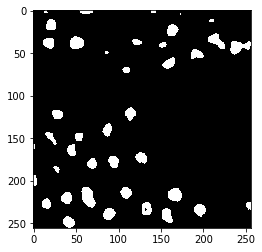

In [167]:
seed[seed<250] = 0
plt.imshow(seed, 'gray')

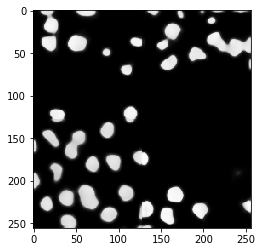

In [151]:
plt.imshow(border, 'gray')

In [30]:
def calc_watershed(name, th=130):
    print(name)
    full_mask = cv2.imread('output/jm_test_2/{}_0.png'.format(name), 0)
    seed = cv2.imread('output/seed_test_2/{}_1.png'.format(name), 0)
    border = cv2.imread('output/border_test_2/{}_2.png'.format(name), 0)
    print(border.shape, seed.shape, full_mask.shape)
#     full_mask = mask[0]
#     seed = mask[1]
#     border = mask[2]
    full_mask[full_mask < th] = 0
    seed[seed < th] = 0
    border[border < th] = 0
    distance = ndi.distance_transform_edt(full_mask)
    # local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
    #                             labels=image)
    # seed = seed - border
    ret, markers = cv2.connectedComponents(seed.astype(np.int8))
    # markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask=full_mask)
    cv2.imwrite('output/submission_mask_test_2/{}.png'.format(name), labels)
    # return labels, distance

In [191]:
labels, distance = calc_watershed('0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732')

0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732
(256, 256) (256, 256) (256, 256)


TypeError: 'NoneType' object is not iterable

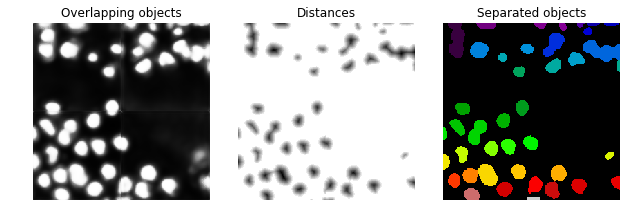

In [192]:
image = cv2.imread('data/stage1_test/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732/images/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732.png')
fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(full_mask, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

In [31]:
[calc_watershed(img) for img in imgs]

0019c086029dd3be01f72131edb74e21ee995574e6d5c136ea868630b0d73523
(256, 320) (256, 320) (256, 320)
004a078bb44ee55ee7d6f1c19f96b3a0d3b5037746a3a75197dbb0be06da05cf
(256, 256) (256, 256) (256, 256)
005463e6d4a0a0b21161f1d97392f22556fbddba970d9440ae774229308a91ed
(256, 256) (256, 256) (256, 256)
005af293e8e53218ae96746ecf9bb88b511154d4a0b35e4ec6296b4623e15836
(520, 696) (520, 696) (520, 696)
005d47447abac7f7fa0ac56ba82f13edbf485105baf0672504d84b58d562f38b
(574, 574) (574, 574) (574, 574)
00ac87390253a22f6eb67c5771a73050e06200d1aa682fcf1b1e3783b2944166
(520, 696) (520, 696) (520, 696)
00b4b9c026cfc91af21691503bad67081fc02d5c77b3cd27200d02dca6966b83
(256, 256) (256, 256) (256, 256)
00da4fe5346bbb36ccf178964a22fdf7e33888989624176a6af3b4a7cfd7da63
(256, 256) (256, 256) (256, 256)
00e36f2470960e84cfc9f0d30c1f76abd7b35e4516380bf74985cbe641086806
(520, 696) (520, 696) (520, 696)
00e67980783eaae30d41f6479beb9c04eb91de4608537673898039094800ddb0
(520, 696) (520, 696) (520, 696)
0109397492bc18b80e60

0ec1e0387baf20d0c858d84fcfcdffd255b87db4d3c59953c5dcbed995e14c07
(574, 574) (574, 574) (574, 574)
0ec673c5a1ebc3b22a1cd58b5ce94d78f66bb96990070c4764ba6f2f80f084dd
(520, 696) (520, 696) (520, 696)
0efaff15b1c4b35d61b0c5159cd32f05265dfa265c9cc8a280fdb78c1c8fba7b
(520, 696) (520, 696) (520, 696)
0f0536b658a471141ffbd901fb579e01ae6bd9c85cf80dbef605783036f091bc
(256, 256) (256, 256) (256, 256)
0f13d4764e2d679eafbd82fd9d6da7a40496f4b7b930bafec85ba271096a0b6f
(256, 256) (256, 256) (256, 256)
0f48fec9292aacdb20335b5e7bd21ae5d07040279aaa9814820cf807a999cc5e
(414, 278) (414, 278) (414, 278)
0f4b066f347e1100c19ede56f0aea61fa506ec67fc97520af0ee608372135c1b
(414, 278) (414, 278) (414, 278)
0f65b01a510741050f6e305eb947b45a94419bdd2bddb37f06fe5a1bebe16702
(256, 256) (256, 256) (256, 256)
0f68afacf5cd6fab74f060a728e1577dce2235bf989c18f1b4ae73562e211dbc
(256, 256) (256, 256) (256, 256)
0f82b626abda7fcfba0893bab7d2946a2b5ebfda29d2c14f79f495d89c51a730
(256, 256) (256, 256) (256, 256)
0f99f1fec1583f2cf374

1ba53e465b8a0f97bb1ebaf2c4e3d76768698904b260a2d0e3d7739c9d5dd2cd
(256, 256) (256, 256) (256, 256)
1bacf56acbdaaae04ac99d812db92bdd423fceec8b9ce8adc75f064a8fc5091c
(360, 360) (360, 360) (360, 360)
1bb368804936b09f70b602288828331f3885941e1e7e87b7364898f8125aadc0
(574, 574) (574, 574) (574, 574)
1bcc50448c2a5ce893f25f10de539012a8f21b71c2d9f8bc7d44bb92cc56983e
(256, 256) (256, 256) (256, 256)
1c08acfac6e7f3dd378f673ef694b3a230e272c7159d54943dbc5bbb050d5dc9
(256, 256) (256, 256) (256, 256)
1c1067f297fa0d77411edf6e66a5c9fa5a9467ad75a8d297e848e6801ccf61c3
(256, 256) (256, 256) (256, 256)
1c1d41c2662ab4a18fa9e8864adb875cb3fbdcd16cd32e617e87ac35992530ac
(520, 696) (520, 696) (520, 696)
1c4872dd308cb6aa336e638c781fd54dd57a2bb44606e22c8ee864a5e496b0bd
(256, 256) (256, 256) (256, 256)
1c4e26959e8326d80104ca7c1f9f21924646aceee86242d6daba338a59154e33
(256, 320) (256, 320) (256, 320)
1c51d140d0c455734a0a2939d6677a6e0b0bf15f74be286bb9e509c2396746e7
(512, 512) (512, 512) (512, 512)
1c538f81e11b8b48ef92

27d338cd46ebe6112400f67cb4dca464c582fad2f0d2b73544bd4018f205c528
(256, 256) (256, 256) (256, 256)
27d57b1c1139062117faf96f6c527a38631cbb833100d2753d2faa29121a817f
(256, 320) (256, 320) (256, 320)
2803f6db7975b04b9596bd54a3420fadd732d1c9b11ffeed0c64b17fe42453c1
(256, 256) (256, 256) (256, 256)
285a1b852717703a725c2ca471405311a662e3a33766379cf0768b5f766e4964
(256, 320) (256, 320) (256, 320)
287369353e973f3fde6a058e9b293ec52de084bc4cd336f9acd77c65cf5d24a7
(520, 696) (520, 696) (520, 696)
2873987398c64d9856b8969ece75b34f4c258de70a20da503db140b408432f92
(574, 574) (574, 574) (574, 574)
28a165948c0e3c7d0610951cc29a67c52842fc95e631a63a756c30ebde94eb28
(256, 256) (256, 256) (256, 256)
28cd5d62ca803753529ff55483f57f24b1cfcd661fb7e20d554f02d8bb0455a0
(414, 278) (414, 278) (414, 278)
28cd702f96c9d3956683efba84f9d8f82fe60dfc9c15f429178104d8a0b6d743
(574, 574) (574, 574) (574, 574)
28cd97ed17aa75358c355d81d564bdaab7fd18ac29c6baf6939eb66526c0c3be
(574, 574) (574, 574) (574, 574)
28f81a16b6cd3459ff97

37704d90bf2625d8bcda7dfbd71e2c1d075cc909ae854fbf18892aeae6d5e12d
(256, 320) (256, 320) (256, 320)
3778b3cd7bc0707d703735c6600fc8013f14e296219d9e199871be974d6fcd27
(574, 574) (574, 574) (574, 574)
3786b55844737ab884341872c338e04a8877a2f893c8cf4477eddd886bc6635f
(520, 694) (520, 694) (520, 694)
379560e35eecf608aaa67248da0f919cd9daecf39ae7f4c867a2476a225182bf
(520, 696) (520, 696) (520, 696)
37c778b8c7c5704ab3d7ac02db6c1f41f057d6feb2760775e50f576ff4378123
(520, 696) (520, 696) (520, 696)
37eac1ecb0360822cdfd38423b623e2980e576bd6e8db280cb32483628a84fe9
(414, 278) (414, 278) (414, 278)
37f8eb0568e57a55e7af8f52962843bcf48b25a721dac3639895a22138de4aac
(520, 696) (520, 696) (520, 696)
380e946d38b4713384ebbe3bac45e2b0e9af58058cb807b37a4696b3465ca964
(304, 560) (304, 560) (304, 560)
38201e51e00f599ca106e3c39573a587b88a238381b2f594a81bb01435896a96
(256, 320) (256, 320) (256, 320)
382cee9585b4614cfaf691cda4721982f56f0741c2089f2fe87419d181e7f122
(520, 696) (520, 696) (520, 696)
3834d3d5aeb91497fc8c

43db44933d2ad50da53974bf974d2a76c8651c69f525919617ca982c754323f6
(520, 696) (520, 696) (520, 696)
43db90aa201fdd722138d1b4ebd4ef45c060c9ab349556344054e496a0216b46
(256, 256) (256, 256) (256, 256)
43e02f592b3416fa74e606bde87b998b8c480bb2a73e0864ccc4860da2107c2a
(256, 256) (256, 256) (256, 256)
43e638c4301021cc861f8d7dc50098635d9d6266045687f37a2adcfc84faa58d
(256, 256) (256, 256) (256, 256)
43f69a84e93b973656e6ad5bbfbfdc898c6a90ecd136eef05daaeac187630f2f
(520, 696) (520, 696) (520, 696)
43fd8a1178c630a9d1ea8e213d6baa440f37e8948859fc0ce08c8a14c59efc35
(256, 256) (256, 256) (256, 256)
44152ca6bc142d01f2303026cfe1c77aff8992cfed2dbf73271743deb6b22b0c
(574, 574) (574, 574) (574, 574)
4422c9a46e88982416e1b4510dfeb6a745d8f7380f9f3b17fa7bd4687672c6f2
(512, 640) (512, 640) (512, 640)
44878ee52fcdc6be01406f6e9946ba95482e1b5d7426c7970dc1ac2c4d628406
(414, 278) (414, 278) (414, 278)
449bbc0d5af722762c1249002bbf7cfdbfde5eaba9eae480f5b7298b58d5574e
(574, 574) (574, 574) (574, 574)
44b558999e715387e4da

5107baeac5b554c41180574a9f3384ca91fca8333ad07453c785a4e27f99668e
(256, 320) (256, 320) (256, 320)
5133c02e3b237590d9362f104323ed96541b1ca64a8041c6b29cefca9c2d0e70
(574, 574) (574, 574) (574, 574)
513b16d3e6f2c41f420349074f17fd096c0c05e63068fa5ca6459fa9ab9a91f0
(520, 694) (520, 694) (520, 694)
5164fda32d6a57286d2f6063abda877ca81a4348bb4445b787533454b9a9c1be
(256, 320) (256, 320) (256, 320)
5167324c328ab6bda48f02b204d548c91202e5b2e3007eb32c28277a885cbbe2
(512, 512) (512, 512) (512, 512)
516859fc4cc22ac8872e85b6ab1ea09b0b66fdd8da39656f142fb4204c0b8679
(520, 696) (520, 696) (520, 696)
516e4f0b64d1c10125a4bfd95ad07cdb67e764d0566b9cfc9728b7855b0f5064
(520, 694) (520, 694) (520, 694)
5171307b70da8e144e5ace020a85a985af8c11360297cc2982e05c5312174e6d
(574, 574) (574, 574) (574, 574)
519171dc2c0ffd25a6bdaa442a30ed622bc24ed8f94302ee77fa279eb342be5e
(256, 256) (256, 256) (256, 256)
5191d4d6c1bd7b526a6d59f856f79b936c32392a074dd742cc00e7b226f8cece
(256, 256) (256, 256) (256, 256)
51a6d3bf97c16e9fcad0

5dbc9f00a649245e749f1ce4aa4664e7e1f9d7d242931ece4ac98f7efb7ca5a4
(205, 694) (205, 694) (205, 694)
5dcbcb20928ada50267bc676a431c662811d46edd91fd76720e434296d32f70d
(256, 256) (256, 256) (256, 256)
5dcbf14327d6c29c671cd18745beadd3453654e1cf90207177a3186c73670e0e
(256, 256) (256, 256) (256, 256)
5de226ec630899a5c6e16da0691baeb96622a013191eb2c007fb0c433c241f12
(360, 360) (360, 360) (360, 360)
5dea9fae1649401cf4b5f4bab416d63f496792aac5605cbdfc532cdb3cf0f412
(256, 256) (256, 256) (256, 256)
5dfdef7486890b822a49cae9fd2e7aa332f782bbac9bb9fc892cd280ff09cf6c
(256, 320) (256, 320) (256, 320)
5e03841f3bd8edb3a734a202dabc29de4a3ce6e985d31672dedd8bbb61c67604
(512, 512) (512, 512) (512, 512)
5e03f7e5cc8d1c64c3787276a2ce7d4d623cc4044e216148026f023420835a75
(414, 278) (414, 278) (414, 278)
5e2d75eb14f2cfc85b5575dc8a29c9881e5cded14b8cf00326658c3d4abab5a6
(512, 512) (512, 512) (512, 512)
5e4cc5704b9660cc061d0e901de3f2d41c44a71286411aa12d650f25a73d36f1
(520, 696) (520, 696) (520, 696)
5e6d5cf7ab4fa2f92792

6cac54fefe515d19363e6da44f5800535fc9bd6f215765bb73c0f3cdd918d20f
(520, 694) (520, 694) (520, 694)
6cb05517ade7f93ccd0deee8338c540419054570826b15f6bc4437a4c9e7a049
(256, 256) (256, 256) (256, 256)
6cb8b273a907691d0e6088f3763137f8b8fbe086ed9897ade37d36e11cc0efcb
(256, 256) (256, 256) (256, 256)
6ccba569255f05adc77b348c7deb77c04c23872df9ebd3d46838ec462f02ba35
(256, 256) (256, 256) (256, 256)
6cccb90ac21a567b030c987b7e55ece70678f9c56607dacd415c334d83d41b9b
(256, 256) (256, 256) (256, 256)
6ce3fcf59360eece32fbacebd458f243309758a5143df7d87ec302d02e792c73
(256, 256) (256, 256) (256, 256)
6d2d15f838d1fe2416a3da327eb0aec0199a74ff0f530d224d3c9257c5484324
(304, 560) (304, 560) (304, 560)
6d38b72f133a4c0285007069af94b2737c9a90418c2d10ecd19bb2e72b11d54f
(256, 256) (256, 256) (256, 256)
6d73bea8402a6e851c674233d6d251fa114348f344aea3a9367ec68ea877d62c
(256, 256) (256, 256) (256, 256)
6d7b793eef57df2d7f4aa138054a5df8eda109ac7f44fdf43b43c059887ac979
(256, 256) (256, 256) (256, 256)
6d805b88e10c6c46b4c6

7b74800ff4b5c1e43919f825b1e41f5ea428240596a32c591d44d53b0476b21c
(304, 560) (304, 560) (304, 560)
7b961044158e0b7737530e0ebc0f9af32253d0210b69525b4fca64894d049736
(256, 256) (256, 256) (256, 256)
7b9c0a511554796ef3a8c3186e43aca1fb5f683e13f93e5278fb2a9f4ccfdb40
(256, 256) (256, 256) (256, 256)
7bb1a9d0f776d8b2657433712ebc6009c0cb95d15af397c39c71871ea5c3128f
(256, 256) (256, 256) (256, 256)
7bd042d57c137801c30ffb011f5e57c6e3f7fc60a87434ffc6737aa00011cfb5
(520, 696) (520, 696) (520, 696)
7bd12034923d627485faef9aec30e6f7636dc43cffacdaa3beff3171360fcef2
(574, 574) (574, 574) (574, 574)
7bd7e3b0342aa838e034915769b58178445177c84ef9abb8ebb5388ff8d2e12e
(256, 320) (256, 320) (256, 320)
7bdd3ca674c4c9932539c1ccaf2d7826d33542927ef5dd59477ad9aeb9cc9afd
(520, 696) (520, 696) (520, 696)
7be5bb61c8187ae30c064ac8f6f473dde763c986a6705f138479a4b51e8ccf39
(512, 512) (512, 512) (512, 512)
7c055ce40072bae2242ef39251bfd2110996e122cdbdcac28fc6689b57ccea87
(520, 696) (520, 696) (520, 696)
7c09f1125fc7cdf68dda

89c8b3eee3859441b60c8fb9d916d270f56070dae3074b0d86c12f158a4e74b4
(256, 256) (256, 256) (256, 256)
89d105b40aad570b910dd70a8ebf6cac8c9b96f67ddd5442696347515c23b8bc
(574, 574) (574, 574) (574, 574)
89d809c7f4794e35e257ef22ae7aa84b34d9da7da799cbeb51e7aa8d8ba60698
(256, 256) (256, 256) (256, 256)
89dcf8b765b65c32c22df9898bc237cab1e253a1e6ec0c8c2b902cc47a5ed549
(520, 696) (520, 696) (520, 696)
89fd0b4dcb88b843cfe92353abc87aeb47d38404613e2c794b546f6ed3e2da12
(256, 256) (256, 256) (256, 256)
8a0513c1c0abda1d99fd9ecbb7e4ea4a4d330d5c6ffde4037508f88d4294deda
(574, 574) (574, 574) (574, 574)
8a1cabd715b721bd30b29923d7f3443211e26bc783c5263ac67d778602f72657
(256, 320) (256, 320) (256, 320)
8a4d9472f8396ae0e412627cd02aba185c9a29da31c486919b9c8cc1b3523b02
(256, 256) (256, 256) (256, 256)
8a81a27f2b59768dbff994577c11dcd4ead0bb7eb72233a476fb53774823531d
(256, 256) (256, 256) (256, 256)
8a8e850a72fae13dd650b5347d95e07ea556c9146a0a3c9469534bddf984407e
(256, 320) (256, 320) (256, 320)
8aa050b5751fdaa5c145

9824c0a40f305083c23bf90bb4598aff25f8d6c036e1a5e89a76c162cb9beb5b
(256, 256) (256, 256) (256, 256)
9842c6b9d37a5d8cb7d05abc00ec53515db5f109ff6960e9394b2306260b4a28
(360, 360) (360, 360) (360, 360)
985b8377a77835a93a27ac12b9e82a2649f14d0f08e71bb038f30dff82c6398f
(520, 696) (520, 696) (520, 696)
9876cfe9db24353a7eed529d7bcbca9d1e2ec2f8945fed30a039aabe7f0c672a
(520, 696) (520, 696) (520, 696)
988075e9b32879250545dbe5680b8711fc095fd01d6acd8a67aa2a713ea82178
(256, 256) (256, 256) (256, 256)
98925627c09fe7758695fb031ed323998658934044f4418a6134edf6c7f54147
(512, 512) (512, 512) (512, 512)
98b4763b9f9dcfca291e7d58efb71bcecad43efebb515c723484f6822e999528
(256, 256) (256, 256) (256, 256)
990ce3042342802a19b1724deb11b9ee070ad50c949ad87bb521c7f00f732eea
(256, 320) (256, 320) (256, 320)
99115b572d8ddf273abc5303ad29d34c3df8b66d101dab4f60b4765e0828bf8d
(512, 512) (512, 512) (512, 512)
9920125f2abc6ff0d64ab7ea83d85593bb251d3cac6dc944ebe8aebeb0bd2bd8
(256, 256) (256, 256) (256, 256)
9969c14820252f240d05

a53dc1837266764ced9700f7a832b463768f3b017ad866c609b1f5e2c5a2d82f
(574, 574) (574, 574) (574, 574)
a53ddd422aa4bb01a3c581216aae2d5ca5c8c8eb57340c62a4e5a4ba77d89943
(256, 256) (256, 256) (256, 256)
a545e3f4c6e245def2e172e69ef1a98c8cce0ca0d16ad0271c3f42ecf43367c4
(256, 256) (256, 256) (256, 256)
a54ff3288103b4044882c3792d7cdcb7a4d550d8775e3d0e121d50f9032ac6ce
(520, 696) (520, 696) (520, 696)
a557acd0c164a06e5b51ce7247b091f42611b75c23e3fd73ef7bbe0f12875e25
(574, 574) (574, 574) (574, 574)
a582ca882032f1cb2fbbab13d95a0bbfa0c85bf2d0d32a855d783c8abad6240d
(256, 256) (256, 256) (256, 256)
a583b792fe9a97c9daef508250945d49375cdcfeea8d2df39db0185ad896a391
(574, 574) (574, 574) (574, 574)
a5c33517d780bba8c720e59793dfbfa19a3a032c59ca7ae54a6ae5211a9b4d4c
(574, 574) (574, 574) (574, 574)
a6412a026197af212a76a5be47fb1f21c998384e79665904aa4d553f8de66252
(304, 560) (304, 560) (304, 560)
a65023622e55326292906ae94eda9c78234c0e4ef01be059251ee8af779637e3
(520, 696) (520, 696) (520, 696)
a6699003eeb612d96ba2

b4d9a609c4640a74b7bcd2cbceb442ce0a5d42c0c752efa1fe902ccd180e517a
(256, 320) (256, 320) (256, 320)
b4e4d83f64a7ebc47ba55e4d266e04d384ceba1ac6105259796bae3020bed0f5
(520, 696) (520, 696) (520, 696)
b50b73fdf820ae969a22ed2674b87f7f88d6570218527358a203e360224b4e98
(256, 256) (256, 256) (256, 256)
b514388b066529761836aa47d0a71deb516ef496589d03431da596e73bb99346
(256, 256) (256, 256) (256, 256)
b51e41a3fbd57e2be8d4d7f606a45331fd05eed423e7d49c19047ada3956f561
(256, 256) (256, 256) (256, 256)
b5295364bc548b77e734fcbd125df9755a99ecd034fe242f2b917d6580b08a4b
(304, 560) (304, 560) (304, 560)
b52b0e837c521125deb7ae7a9956b24a3d1665aad0e5e5ffd2c6ed39ad57634c
(256, 320) (256, 320) (256, 320)
b55feb7bbc16c2e0ffe2aeedaa0bc0f62b0052a41b3408abcad4b375a7ee5107
(512, 512) (512, 512) (512, 512)
b57ae10da2fe82b83874d51f18d9a76f2e374759c754734a5dddf812a50a1317
(512, 512) (512, 512) (512, 512)
b57c8330eb99bf32c4eca0fcb3dcee30161d4be007c28614d8fedb83d6d9434c
(256, 256) (256, 256) (256, 256)
b589bd86034399b3f44c

c211e034610f159b0d824be86d88be3d3a41b5118a31cf66d3d89324908c84ed
(512, 640) (512, 640) (512, 640)
c22c3be7e8a0eec506719f590d4b9477658036233a7a5edd1c264ce98c77a9e8
(256, 256) (256, 256) (256, 256)
c24ae3d5407b462763d86329d9946d84bd096d46fd038c875a06f96ea2f216f0
(256, 256) (256, 256) (256, 256)
c2ab237f799d822fcaf20aa2e127ec13caf6f5d7e744d376765febd3d487f44c
(414, 278) (414, 278) (414, 278)
c2b00ede2d2e1bb8726ba8a6e3e36094a5f4b9240f7f85ed75ac6e2e6ceaf264
(520, 696) (520, 696) (520, 696)
c2cef17dddcb0a888cdbcfa401d3ad562fae1c6eff12fa1e1d446a738438c400
(574, 574) (574, 574) (574, 574)
c2d36bd0202a94a004b93c5d53a17ab129881482a428f4064e7184e610a215de
(256, 320) (256, 320) (256, 320)
c2e068fc908f154e2012610fd379112eec39639ea1d0a434e503777039fade4f
(512, 640) (512, 640) (512, 640)
c2e1a82db069dc316a1337c3134265869df9f0edcc67435865b73c46ab5b9fd6
(256, 320) (256, 320) (256, 320)
c2e5a041172ebe9ac4c881b6acfed5ee1b74ac7d1f56a1d4215e8c6b2e6aa369
(512, 640) (512, 640) (512, 640)
c2f79bd23fe718679f75

cf9e9c456b935c675fa7b983d7474933155c417d6faa5c6159c303a5f27f65d3
(256, 256) (256, 256) (256, 256)
cfb83f0ffbf3bb125279bb22e882ff21c210043c939ea87d1fbab7159c062366
(414, 278) (414, 278) (414, 278)
cfc2ce5cf4f1ea16c1c55cb383828954e69f7b663233955baadcbade5991442c
(414, 278) (414, 278) (414, 278)
cfee8c233b9c0452cfe835e21bd68128eecb0e453a0fe9064faa78358035e41e
(256, 256) (256, 256) (256, 256)
d01ecd70e525919b756b0195fcde83f7e02f69381a163fbe0cf702484a7408b9
(512, 512) (512, 512) (512, 512)
d0263b646ce73c8c6003681aead96f539fea3d9eeb7e4958ba4052189a15ebd2
(256, 256) (256, 256) (256, 256)
d02d5c7cd8318568f4133ac948e3d0a7f01b9e5406f869ce50b543554174b602
(574, 574) (574, 574) (574, 574)
d039276d56fc9c15bfda6d886a60f052aba1a58959205025ab527750fa3ec3c0
(256, 256) (256, 256) (256, 256)
d045850c9667f10ed2d274de7d1250fae50576cf787ec1bbb8d0680bb976dfe6
(256, 256) (256, 256) (256, 256)
d0471866fa36a8fc2a75e3f7c0b996d85982a709362b37db7550da7875830d11
(256, 256) (256, 256) (256, 256)
d04d0f17869a71b9bf87

df672aa6247409b8018dfb40c6bc3435529c81e60b1f13a395d38d195721fe4b
(304, 560) (304, 560) (304, 560)
df6ceee24694f61510f32b43ceebf2e6e7e8306f3543f48a28b64c48c3988376
(512, 512) (512, 512) (512, 512)
df7b1dc8e2ceb5c61e4abb7fca4d1748e2d30756fd8304b34fe4ea258900b860
(256, 256) (256, 256) (256, 256)
dfa70dee49d59b008d6a495130e8aeab1be2cca07cbb274764a59bd7a17e5b58
(520, 696) (520, 696) (520, 696)
dfa7b7f1d4da24fa16e3c1dfbf6135fdf529f1ec21850dfae1b560e00ae29b66
(256, 256) (256, 256) (256, 256)
e0059cfbe84bb628c343add0a8e0ff6b2f9650884c2384319170aef11399c648
(256, 256) (256, 256) (256, 256)
e02485af2e958500d9f2fa70f6fa2d33920a91f911d649efa1f531213505ab66
(574, 574) (574, 574) (574, 574)
e0480625325c11f096d540a8cda158397095e0efa287fe7b0658477566ee48c8
(256, 256) (256, 256) (256, 256)
e050ee61d06a9cb58eac6b7cc8bd6ab07cdd86302cef8c8261dedbfa493a8845
(256, 256) (256, 256) (256, 256)
e06effa06e5de8481b0380fbbe479a0463a22480d945b89e6dd03f1028788fa9
(256, 256) (256, 256) (256, 256)
e077af56a2b89c7891ad

ee6a068fe30f6455c6c3783b780504f285c7bb588862298a942cc6f971117f96
(256, 256) (256, 256) (256, 256)
ee8780b8fad230c37beab528a7f53f81bd26e325cf4e0b358e48246e945623e3
(574, 574) (574, 574) (574, 574)
ee8cf5676454876537bb1b2ca305c984acadb1ce6a7253978f32c82a4f1fe442
(512, 512) (512, 512) (512, 512)
ee9a871729614a575fdd557bdb2c1a6bc95a2ec43cf4d7f7238d46131675a8d1
(256, 256) (256, 256) (256, 256)
eeae229e397ab1a7fcbaf2592208db7499f2ab84769917f8029bbebafe89f677
(520, 696) (520, 696) (520, 696)
eeafb63c6c1b71434445531840e2c8f3537e17b8da5d292c0b4497267901f7be
(256, 256) (256, 256) (256, 256)
eeb409b8b8d9ecd09b54da04c3b49293703a9f666096578e5adc6ab3827672ec
(520, 696) (520, 696) (520, 696)
eeb6873e29c2cdc402531da256a33ec1552abe95128e8c7827b403702513ace3
(574, 574) (574, 574) (574, 574)
eec54961b9dfa793f142e530d2389daef5724699f5eac65f398ef2206e7672aa
(304, 560) (304, 560) (304, 560)
ef068f8d4e9ea573280727c114e47a7d3139772c15d7c978e319ef0dd943ffbc
(520, 696) (520, 696) (520, 696)
ef16ff46df1e67486abd

fd2ecc4d69378f10d401992f83dd7a256701fefd45878fd15af2e4abece75559
(520, 696) (520, 696) (520, 696)
fd450e91e5104ee3d3e9dbcb7118ddf0dcb061e1aefc091d201369c13d00a24f
(574, 574) (574, 574) (574, 574)
fd4df12b775dd8eece392ec47cd7565c1b52b7d622bff3560e9782bac6e9a2b3
(414, 278) (414, 278) (414, 278)
fd849405326b95ff997939d18b8560212d602d6c2fb5746e4051b8ba7091acd3
(256, 256) (256, 256) (256, 256)
fd8538c83832e683d0ed1a35f4c878765c604d92cf96ed15fe42300c71f8a5ad
(520, 696) (520, 696) (520, 696)
fd959b91f1fd8971f6e0cfc0848e80e302ca748bb26daf1aa5c70d5e07b416c6
(256, 320) (256, 320) (256, 320)
fda5c593adf95f91aac8aae34f4ce0c5ad38ff49e740852b9522ea8aacff2aff
(520, 696) (520, 696) (520, 696)
fda7e9a21f40ce89f7368c5a2fb47957ab4de41bfb52d66134470104f279887b
(256, 256) (256, 256) (256, 256)
fdb3f0ce1ce05bec83681ae64d549820d3c2f5e543ba8cc355d602f334f6bde6
(256, 256) (256, 256) (256, 256)
fdbc93d21ee6545e8d48a6545a348c464df0378e9ee1e5e572714adcc5e05892
(574, 574) (574, 574) (574, 574)
fdbdd162d5c1454d1f74

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [19]:
labels.shape

(256, 256)

In [21]:
full_mask.shape

(256, 256)

In [130]:
lab.max()

30

In [32]:
import numpy as np
import skimage.morphology
import cv2
import pandas as pd

def rle_of_binary(x):
    """ Run length encoding of a binary 2D array. """
    dots = np.where(x.T.flatten() == 1)[0] # indices from top to down
    run_lengths = []
    prev = -2
    for b in dots:
        if ( b > prev +1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

def mask_to_rle(mask, cutoff=.5, min_object_size=1.):
    """ Return run length encoding of mask. """
    # segment image and label different objects
#     lab_mask = skimage.morphology.label(mask > cutoff)

#     # Keep only objects that are large enough.
#     (mask_labels, mask_sizes) = np.unique(lab_mask, return_counts=True)
#     if (mask_sizes < min_object_size).any():
#         mask_labels = mask_labels[mask_sizes < min_object_size]
#         for n in mask_labels:
#             lab_mask[lab_mask == n] = 0
#         lab_mask = skimage.morphology.label(lab_mask > cutoff)

        # Loop over each object excluding the background labeled by 0.
    for i in range(1, mask.max() + 1):
        yield rle_of_binary(mask == i)


In [34]:
test_df = pd.read_csv('data/stage2_sample_submission_final.csv')
    # Run length encoding of predicted test masks.
test_pred_rle = []
test_pred_ids = []

In [35]:

for n, id_ in enumerate(test_df['ImageId']):
    # min_object_size = 20*test_df.loc[n,'img_height']*test_df.loc[n,'img_width']/(256*256)
    mask = cv2.imread('output/submission_mask_test_2/{}.png'.format(id_), 0)
#     print(id_)
    rle = list(mask_to_rle(mask))
    test_pred_rle.extend(rle)
    test_pred_ids.extend([id_]*len(rle))

print('test_pred_ids.shape = {}'.format(np.array(test_pred_ids).shape))
print('test_pred_rle.shape = {}'.format(np.array(test_pred_rle).shape))

#  Create submission file
sub = pd.DataFrame()
sub['ImageId'] = test_pred_ids
sub['EncodedPixels'] = pd.Series(test_pred_rle).apply(lambda x: ' '.join(str(y) for y in x))
sub.to_csv('sub-dsbowl2018-final.csv', index=False)
sub.head()

test_pred_ids.shape = (282993,)
test_pred_rle.shape = (282993,)


,ImageId,EncodedPixels
0,0019c086029dd3be01f72131edb74e21ee995574e6d5c1...,3846 2 4100 6 4355 10 4611 10 4866 12 5122 12 ...
1,0019c086029dd3be01f72131edb74e21ee995574e6d5c1...,15361 1 15617 7 15873 8 16129 9 16385 9 16641 ...
2,0019c086029dd3be01f72131edb74e21ee995574e6d5c1...,11526 6 11781 7 12036 8 12291 10 12547 10 1280...
3,0019c086029dd3be01f72131edb74e21ee995574e6d5c1...,43786 3 44041 6 44296 9 44552 11 44808 12 4506...
4,0019c086029dd3be01f72131edb74e21ee995574e6d5c1...,32777 10 33033 11 33288 13 33544 17 33800 19 3...
